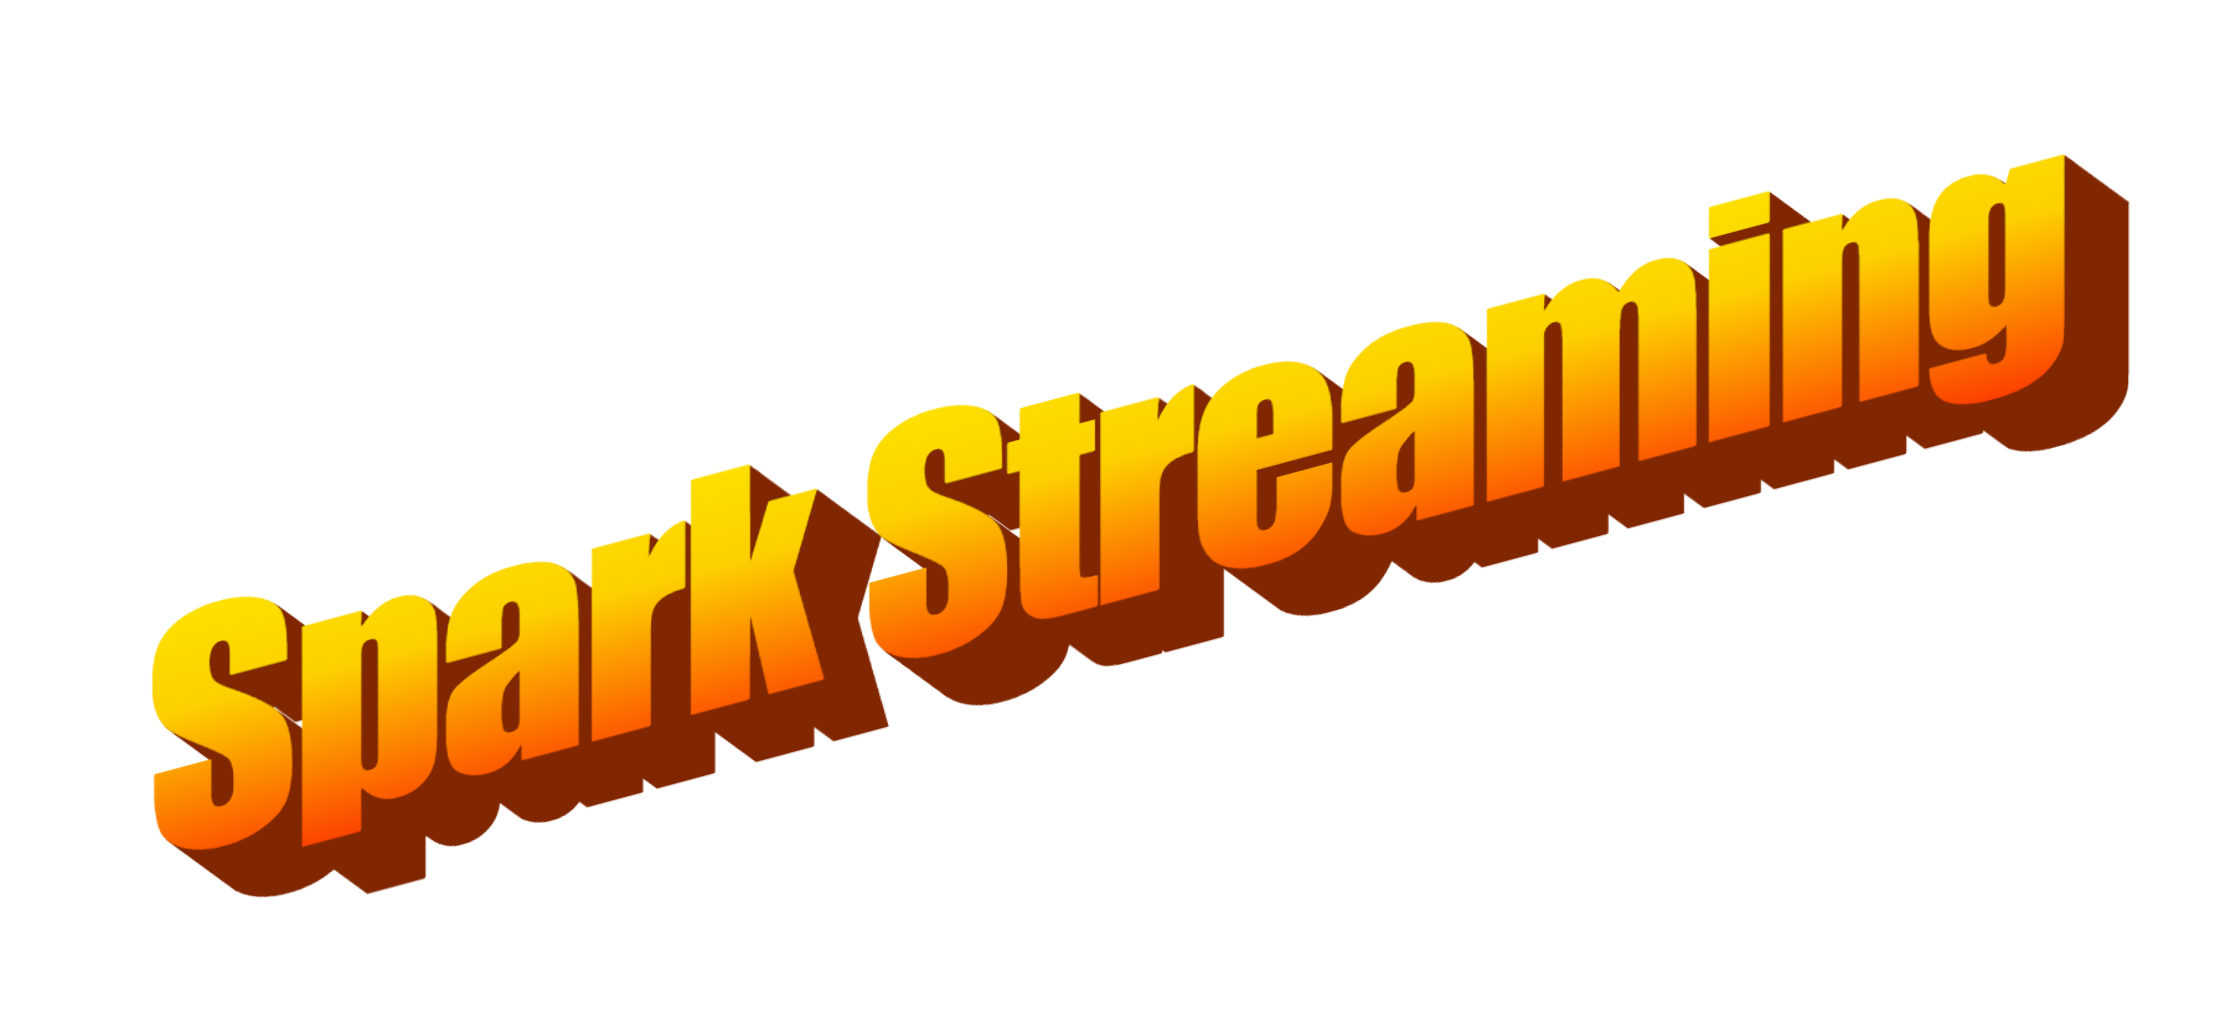
[WordArt](https://makewordart.com/)

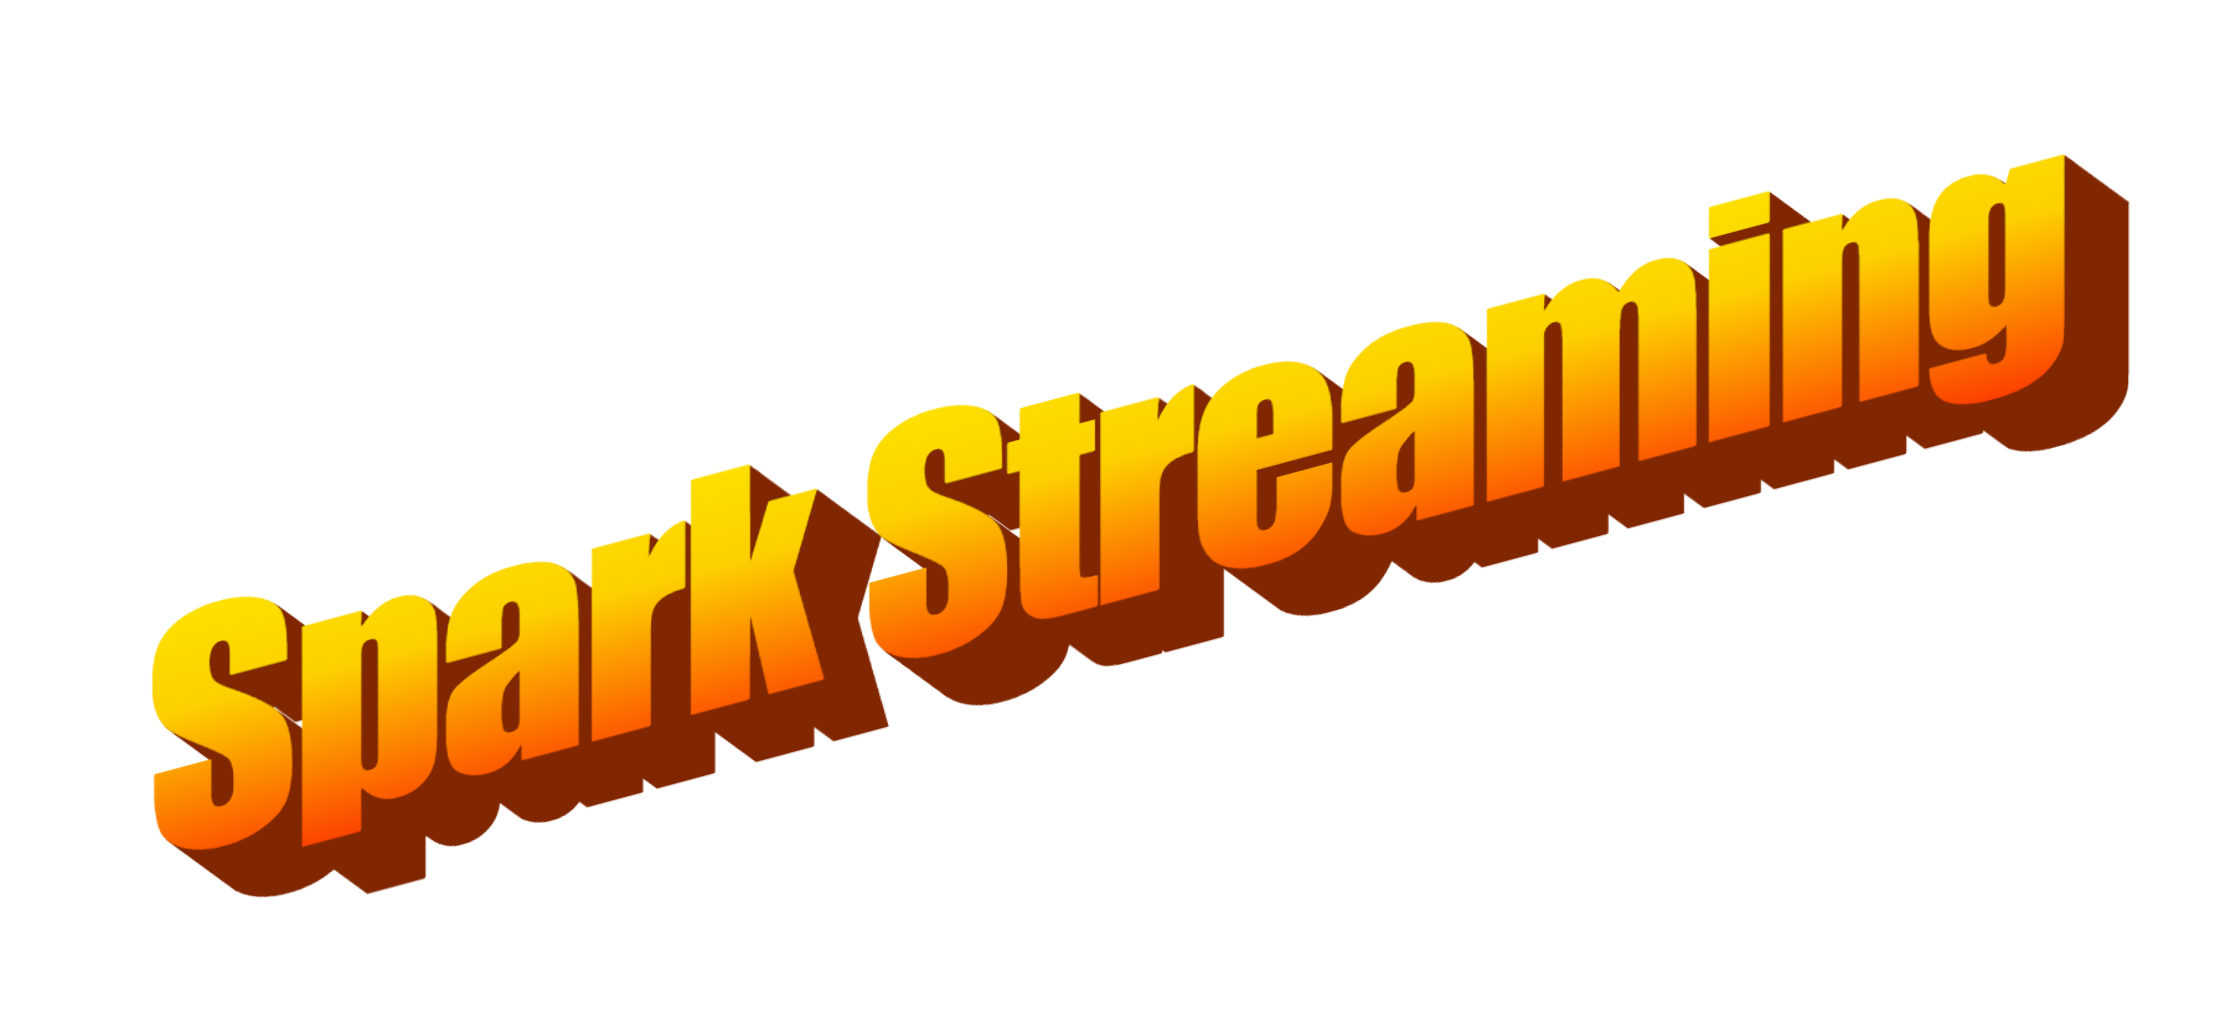
[WordArt](https://makewordart.com/)

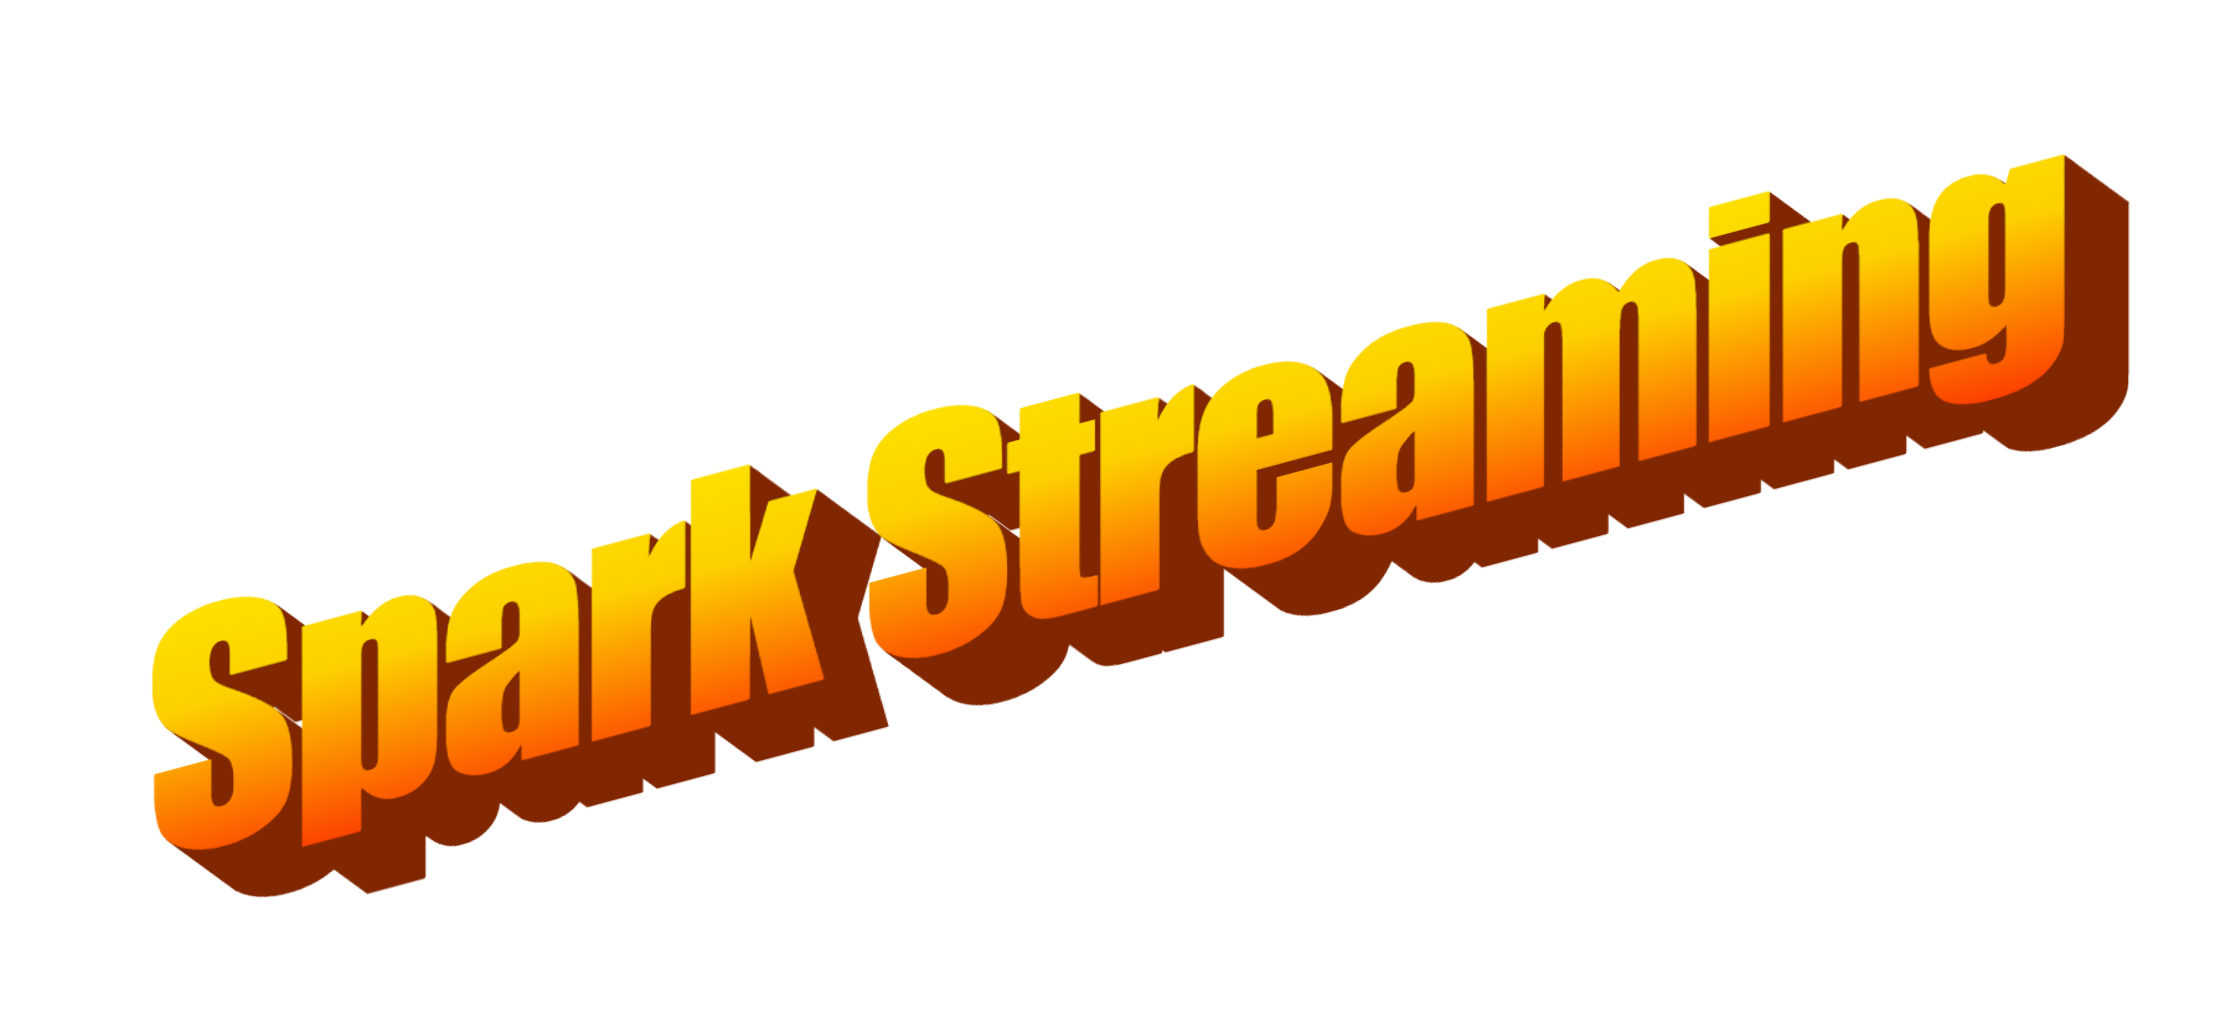
[WordArt](https://makewordart.com/)

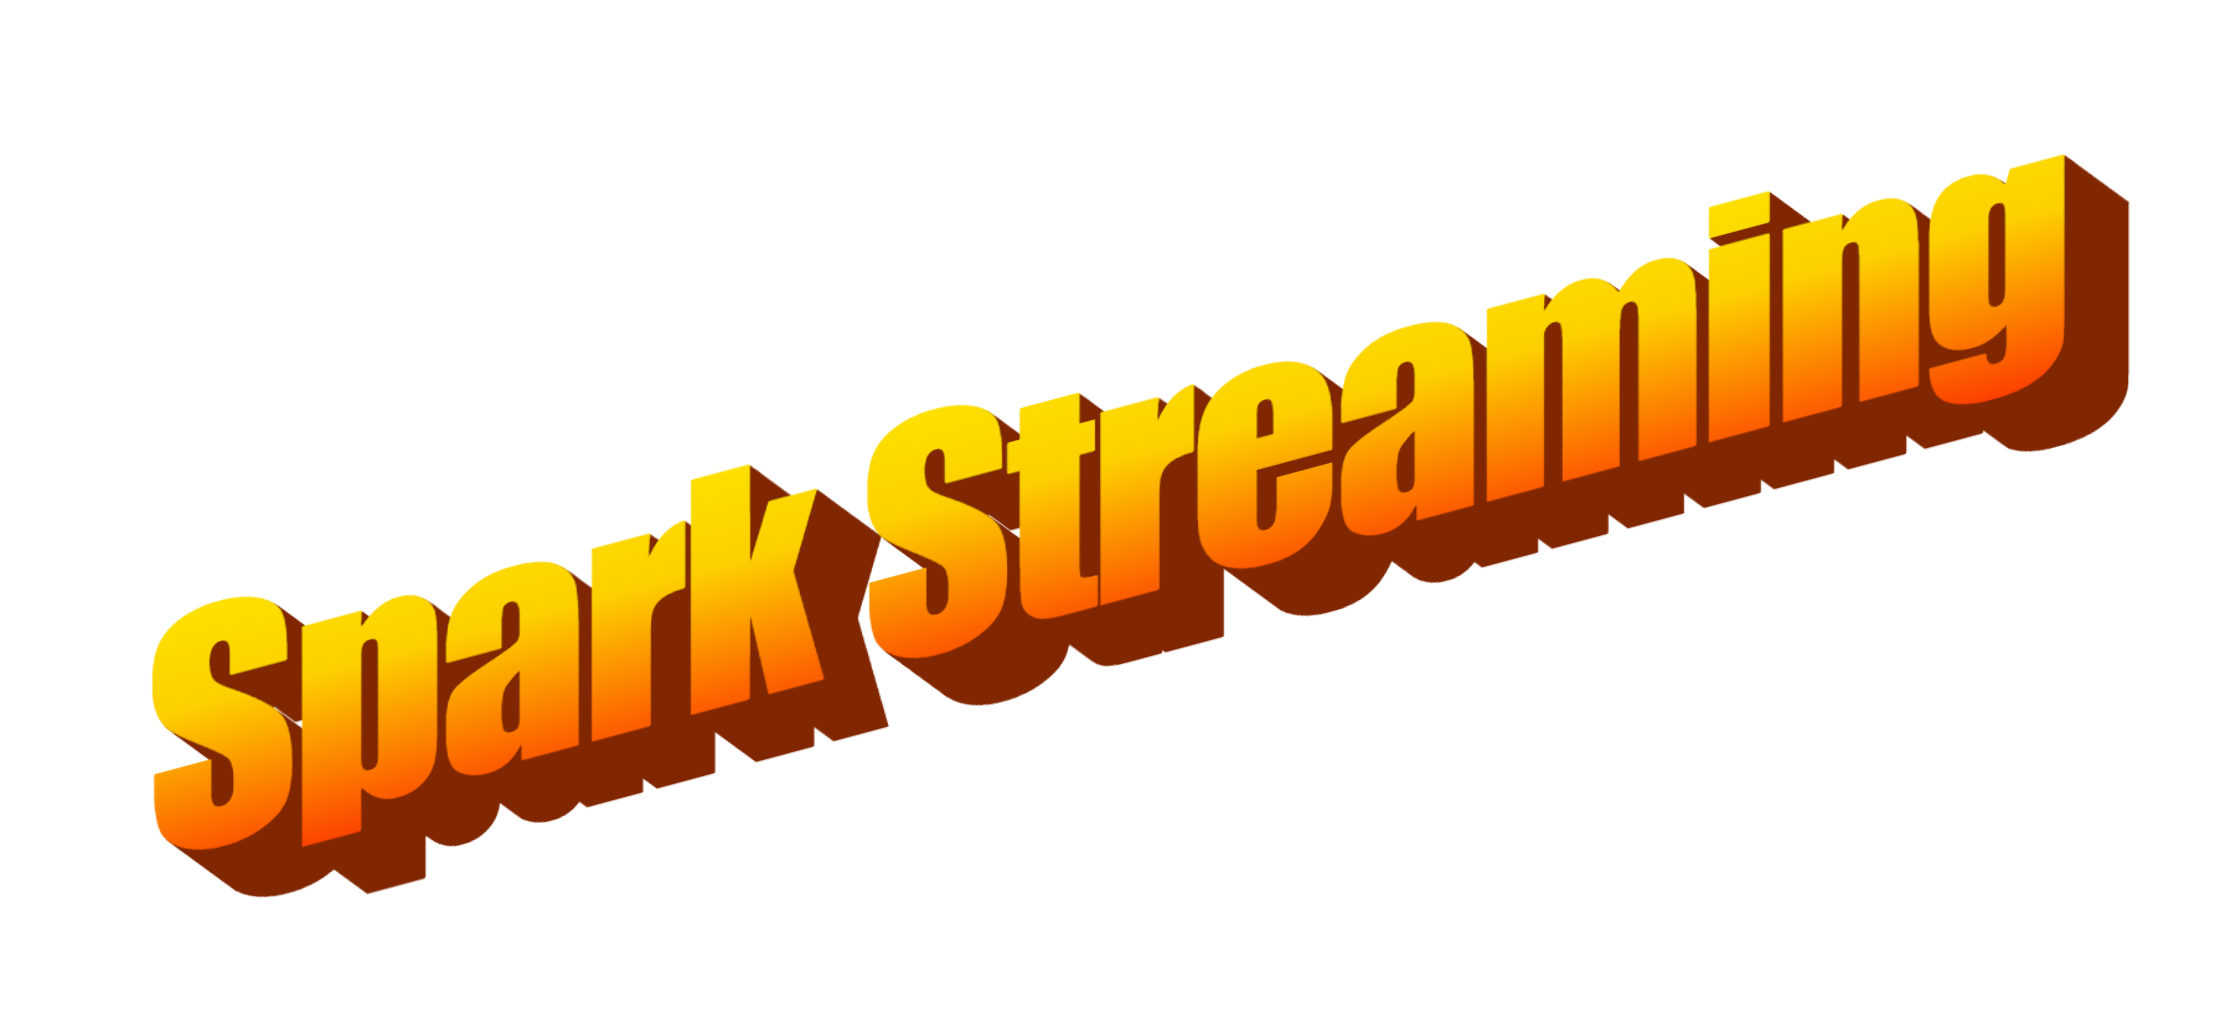
[WordArt](https://makewordart.com/)

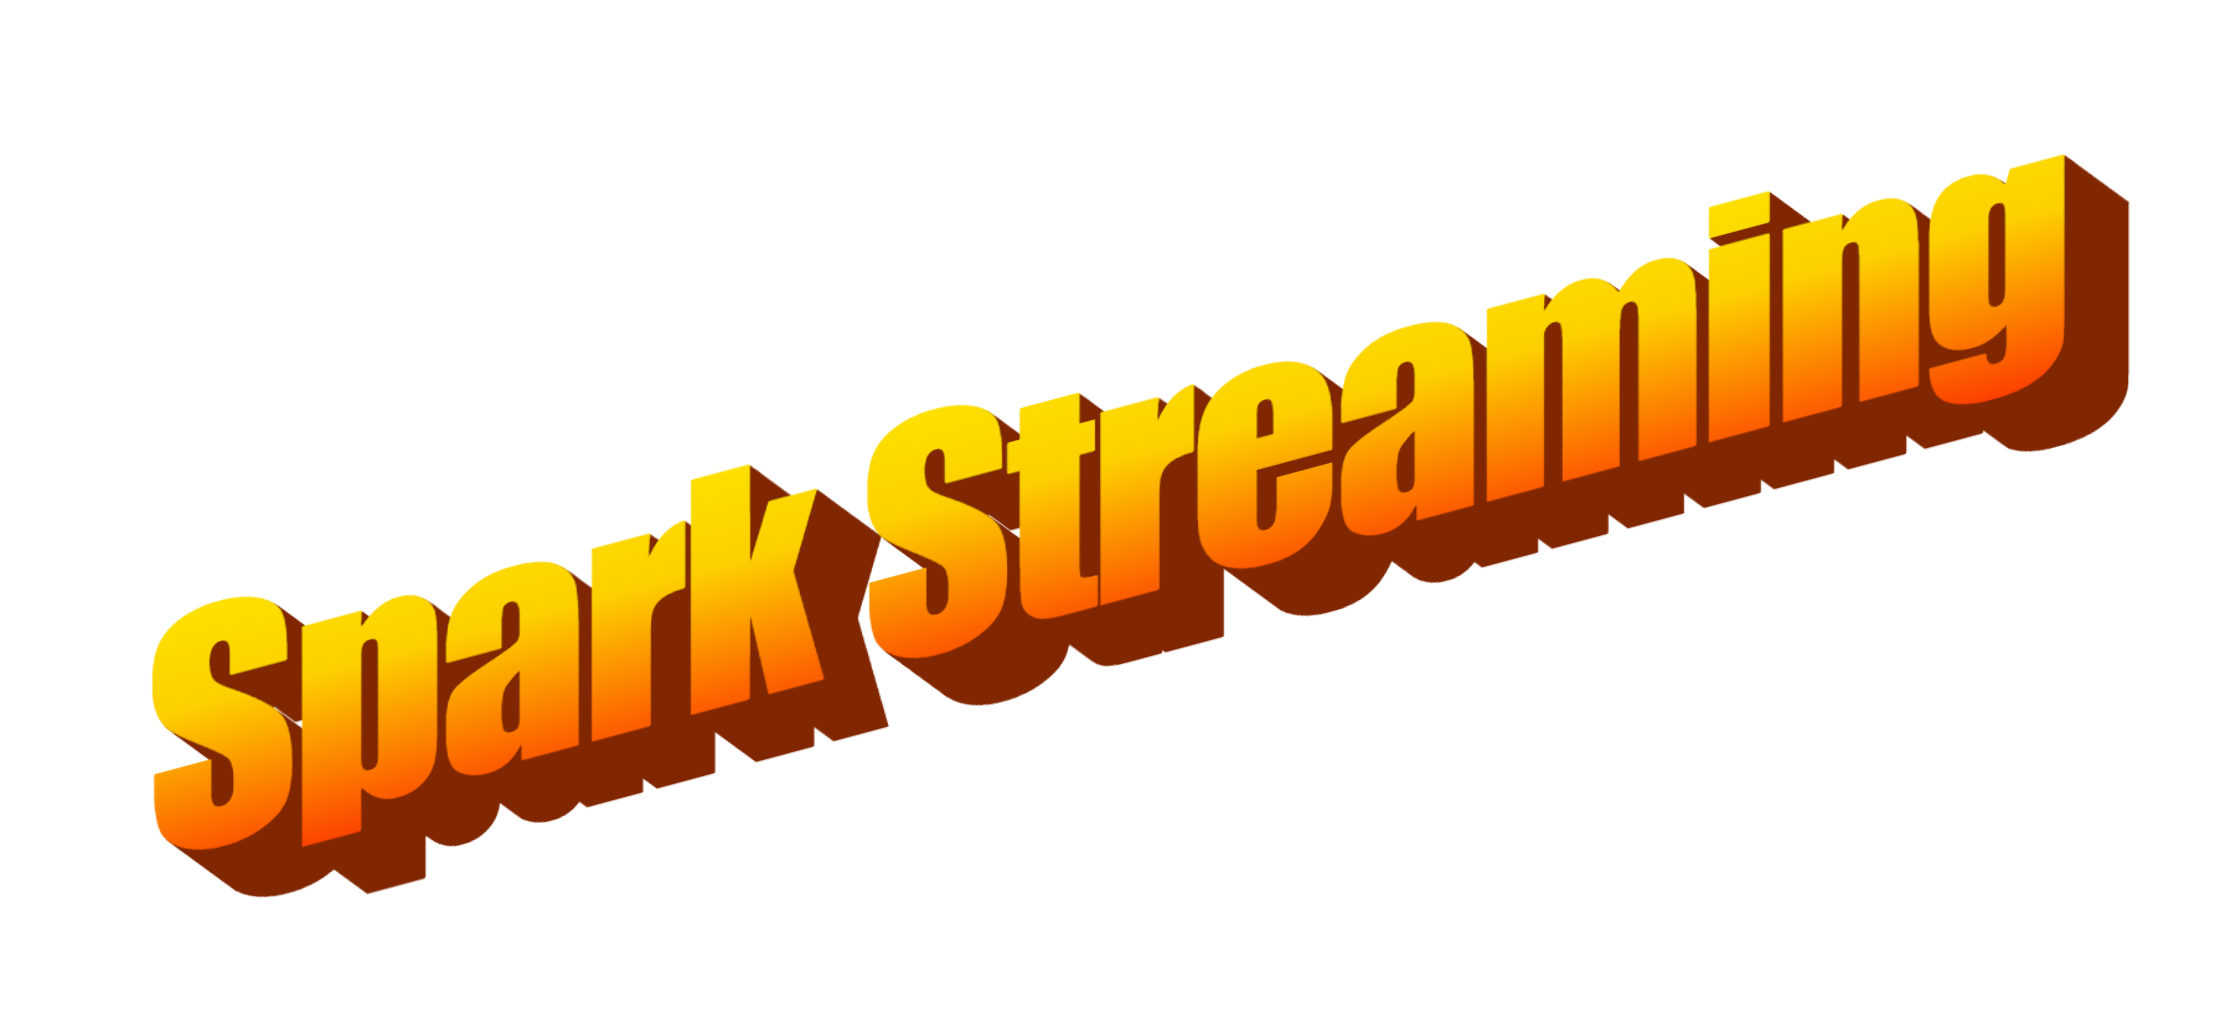
[WordArt](https://makewordart.com/)

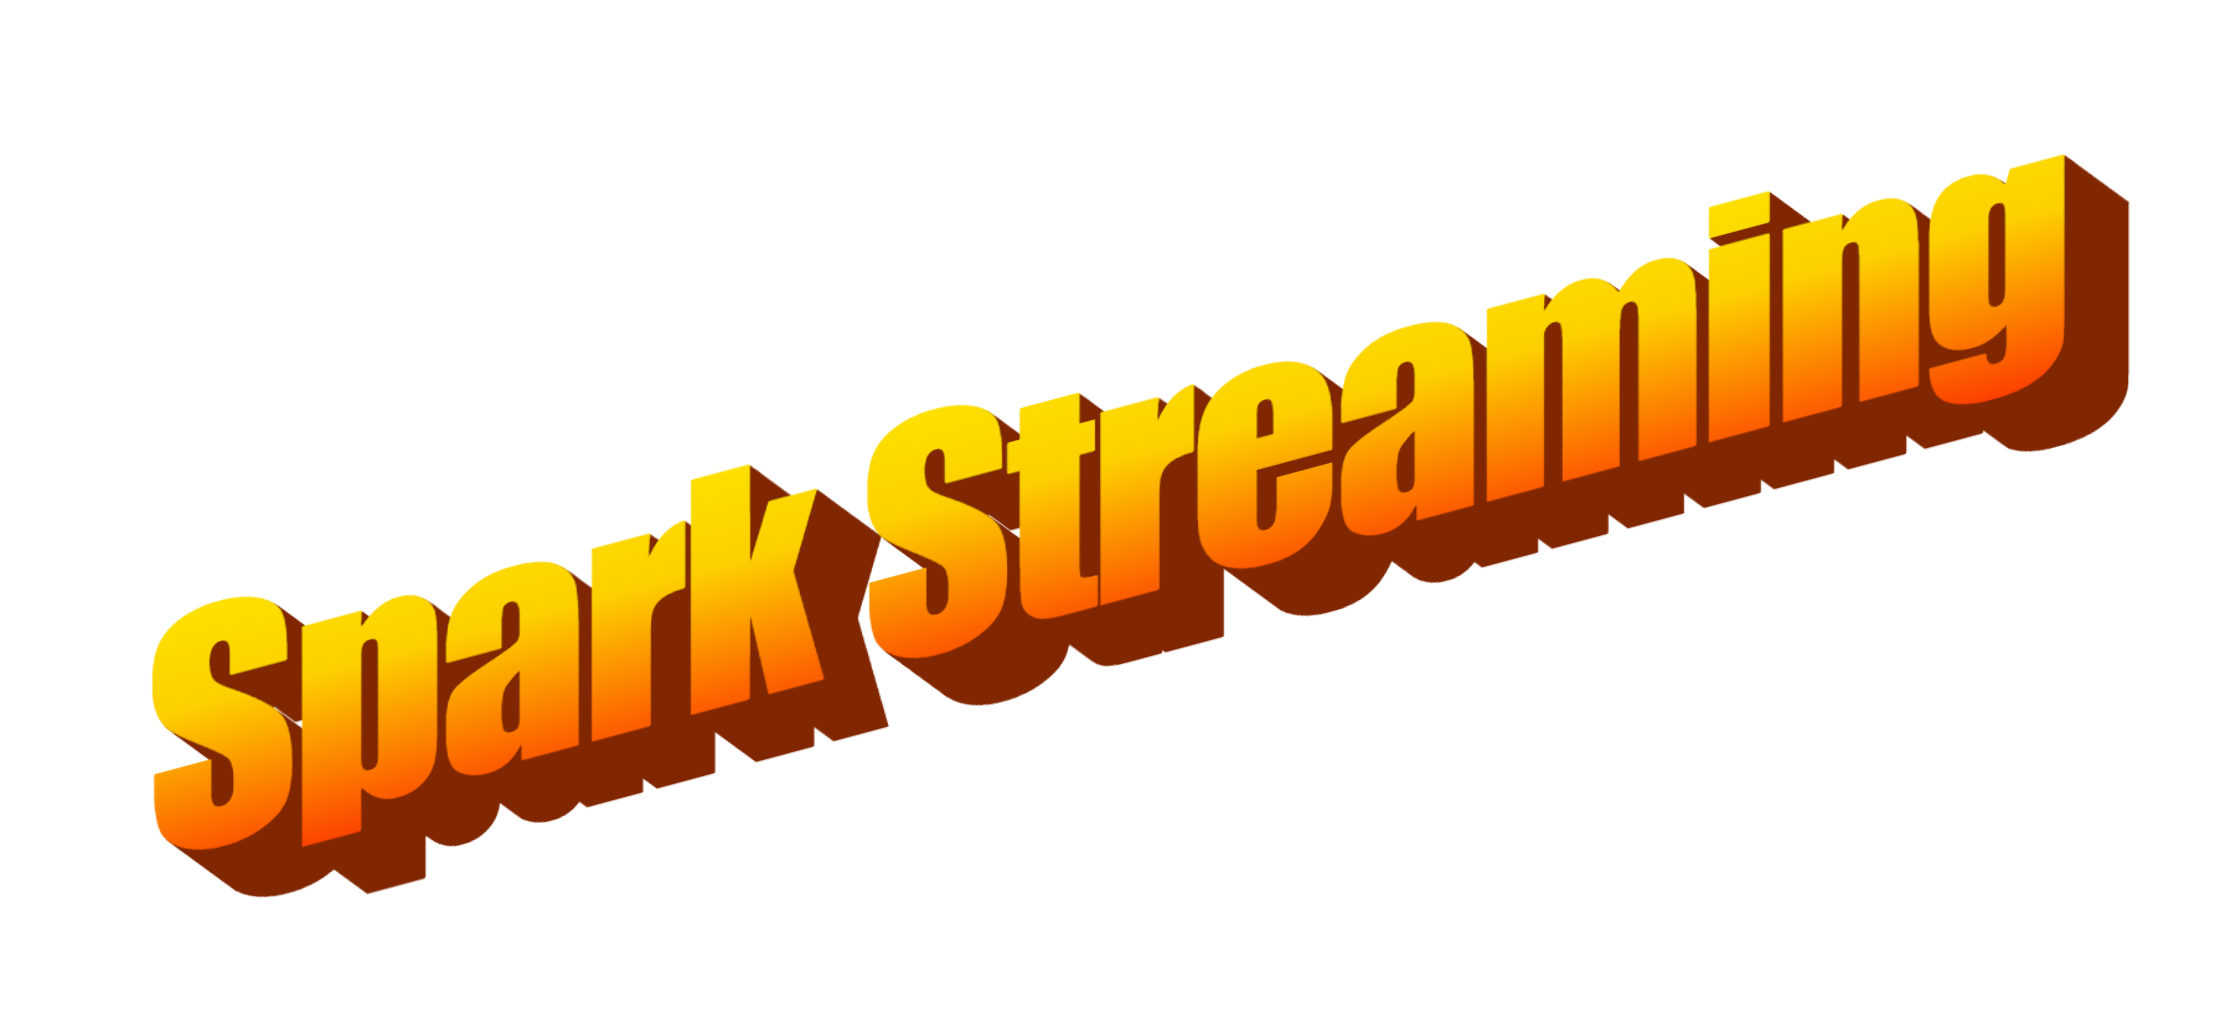
[WordArt](https://makewordart.com/)

![](https://tdwi.org/articles/2017/08/07/-/media/TDWI/TDWI/BITW/datapipeline.jpg)
[Source](https://tdwi.org/articles/2017/08/07/data-all-enabling-real-time-enterprise-with-data-streaming.aspx)

<div class="jumbotron">
    <center>
       <b>Spark Streaming</b>
        makes it easy to build scalable fault-tolerant streaming applications.
    </center>
</div>

![](https://i.imgflip.com/3yg4o4.jpg)
[NicsMeme](https://imgflip.com/i/3yg4o4)

# Features

## Ease of Use

### Build applications through high-level operators.
Spark Streaming brings Apache Spark's language-integrated API to stream processing, letting you write streaming jobs the same way you write batch jobs. It supports Java, Scala and Python

```scala
TwitterUtils.createStream(...)
    .filter(_.getText.contains("Spark"))
    .countByWindow(Seconds(5))
 ```

## Fault Tolerance

### Stateful exactly-once semantics out of the box.

Spark Streaming recovers both lost work and operator state (e.g. sliding windows) out of the box, without any extra code on your part.

![](https://spark.apache.org/images/spark-streaming-recovery.png)

## Spark Integration

### Combine streaming with batch and interactive queries.

By running on Spark, Spark Streaming lets you reuse the same code for batch processing, join streams against historical data, or run ad-hoc queries on stream state. Build powerful interactive applications, not just analytics.

```scala
stream.join(historicCounts).filter {
  case (word, (curCount, oldCount)) =>
    curCount > oldCount
}
```
Find words with higher frequency than historic data

# Streaming Programming Guide

## Overview

Spark Streaming is an extension of the core Spark API that enables scalable, high-throughput, fault-tolerant stream processing of live data streams. 

Data can be ingested from many sources like Kafka, Flume, Kinesis, or TCP sockets, and can be processed using complex algorithms expressed with high-level functions like map, reduce, join and window. 

Finally, processed data can be pushed out to filesystems, databases, and live dashboards. In fact, you can apply Spark’s machine learning and graph processing algorithms on data streams.

![](https://spark.apache.org/docs/latest/img/streaming-arch.png)

Internally, it works as follows. Spark Streaming receives live input data streams and divides the data into batches, which are then processed by the Spark engine to generate the final stream of results in batches.

![](https://spark.apache.org/docs/latest/img/streaming-flow.png)

Spark Streaming provides a high-level abstraction called discretized stream or DStream, which represents a continuous stream of data. 

DStreams can be created either from input data streams from sources such as Kafka, Flume, and Kinesis, or by applying high-level operations on other DStreams. Internally, a DStream is represented as a sequence of RDDs.

# Example

./sparkNC.sh 9999

./sparkTap.sh streamingexample.py

## Streaming Context

A StreamingContext object can be created from a SparkContext object.
```python
from pyspark import SparkContext
from pyspark.streaming import StreamingContext

sc = SparkContext(master, appName)
ssc = StreamingContext(sc, 1) # second parameter is the batch interval
```

The batch interval must be set based on the latency requirements of your application and available cluster resources. 

See the Performance Tuning section for more details.

After a context is defined, you have to do the following.

1. Define the input sources by creating input DStreams.

2. Define the streaming computations by applying transformation and output operations to DStreams.

3. Start receiving data and processing it using streamingContext.start().

4. Wait for the processing to be stopped (manually or due to any error) using streamingContext.awaitTermination().

5. The processing can be manually stopped using streamingContext.stop().

Points to remember:

* Once a context has been started, no new streaming computations can be set up or added to it.

* Once a context has been stopped, it cannot be restarted.

* Only one StreamingContext can be active in a JVM at the same time.

* stop() on StreamingContext also stops the SparkContext. To stop only the StreamingContext, set the optional parameter of stop() called stopSparkContext to false.

* A SparkContext can be re-used to create multiple StreamingContexts, as long as the previous StreamingContext is stopped (without stopping the SparkContext) before the next StreamingContext is created.

# DStreams

Discretized Stream or DStream is the basic abstraction provided by Spark Streaming. 

It represents a continuous stream of data, either the input data stream received from source, or the processed data stream generated by transforming the input stream. 

Internally, a DStream is represented by a continuous series of RDDs, which is Spark’s abstraction of an immutable, distributed dataset (see Spark Programming Guide for more details). 

Each RDD in a DStream contains data from a certain interval, as shown in the following figure.

![](https://spark.apache.org/docs/latest/img/streaming-dstream.png)

Any operation applied on a DStream translates to operations on the underlying RDDs. 

For example, in the earlier example of converting a stream of lines to words, the flatMap operation is applied on each RDD in the lines DStream to generate the RDDs of the words DStream. 

![](https://spark.apache.org/docs/latest/img/streaming-dstream-ops.png)

These underlying RDD transformations are computed by the Spark engine. 

The DStream operations hide most of these details and provide the developer with a higher-level API for convenience. 

## Input DStreams and Receivers

Input DStreams are DStreams representing the stream of input data received from streaming sources

Spark Streaming provides two categories of built-in streaming sources.

- Basic sources: Sources directly available in the StreamingContext API. Examples: file systems, and socket connections.

- Advanced sources: Sources like Kafka, Flume, Kinesis, etc. are available through extra utility classes. 

## Basic Sources

### File Streams

For reading data from files on any file system compatible with the HDFS API (that is, HDFS, S3, NFS, etc.), a DStream can be created as via StreamingContext.fileStream[KeyClass, ValueClass, InputFormatClass].

```python
streamingContext.textFileStream(dataDirectory)
```


 ### Example
 
 ```bash
 ./sparkTap.sh streamingloglinux.py

# Login into 
cd /tapvolume/
root@0fa2d4c5941a:/tapvolume# while(true); do echo $RANDOM>$RANDOM;done
```

## Advanced Sources

This category of sources require interfacing with external non-Spark libraries, some of them with complex dependencies (e.g., Kafka and Flume). 

Hence, to minimize issues related to version conflicts of dependencies, the functionality to create DStreams from these sources has been moved to separate libraries that can be linked to explicitly when necessary.

Note that these advanced sources are not available in the Spark shell, hence applications based on these advanced sources cannot be tested in the shell. 

If you really want to use them in the Spark shell you will have to download the corresponding Maven artifact’s JAR along with its dependencies and add it to the classpath.

Some of these advanced sources are as follows.

Kafka: Spark Streaming 2.4.5 is compatible with Kafka broker versions 0.8.2.1 or higher. See the Kafka Integration Guide for more details.

Flume: Spark Streaming 2.4.5 is compatible with Flume 1.6.0. See the Flume Integration Guide for more details.

Kinesis: Spark Streaming 2.4.5 is compatible with Kinesis Client Library 1.2.1. See the Kinesis Integration Guide for more details.

## Transformations on DStreams

| Transformation                | Meaning                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|-------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| map(func)                     | Return a new DStream by passing each element of the source DStream through a function func.                                                                                                                                                                                                                                                                                                                                                            |
| flatMap(func)                 | Similar to map, but each input item can be mapped to 0 or more output items.                                                                                                                                                                                                                                                                                                                                                                           |
| filter(func)                  | Return a new DStream by selecting only the records of the source DStream on which func returns true.                                                                                                                                                                                                                                                                                                                                                   |
| repartition(numPartitions)    | Changes the level of parallelism in this DStream by creating more or fewer partitions.                                                                                                                                                                                                                                                                                                                                                                 |
| union(otherStream)            | Return a new DStream that contains the union of the elements in the source DStream and otherDStream.                                                                                                                                                                                                                                                                                                                                                   |
| count()                       | Return a new DStream of single-element RDDs by counting the number of elements in each RDD of the source DStream.                                                                                                                                                                                                                                                                                                                                      |
| reduce(func)                  | Return a new DStream of single-element RDDs by aggregating the elements in each RDD of the source DStream using a function func (which takes two arguments and returns one). The function should be associative and commutative so that it can be computed in parallel.                                                                                                                                                                                |
| countByValue()                | When called on a DStream of elements of type K, return a new DStream of (K, Long) pairs where the value of each key is its frequency in each RDD of the source DStream.                                                                                                                                                                                                                                                                                |
| reduceByKey(func, [numTasks]) | When called on a DStream of (K, V) pairs, return a new DStream of (K, V) pairs where the values for each key are aggregated using the given reduce function. Note: By default, this uses Spark's default number of parallel tasks (2 for local mode, and in cluster mode the number is determined by the config property spark.default.parallelism) to do the grouping. You can pass an optional numTasks argument to set a different number of tasks. |

### UpdateStateByKey Operation

The updateStateByKey operation allows you to maintain arbitrary state while continuously updating it with new information. To use this, you will have to do two steps.

1. Define the state - The state can be an arbitrary data type.

2. Define the state update function - Specify with a function how to update the state using the previous state and the new values from an input stream.

In every batch, Spark will apply the state update function for all existing keys, regardless of whether they have new data in a batch or not. If the update function returns None then the key-value pair will be eliminated.

Let’s illustrate this with an example. Say you want to maintain a running count of each word seen in a text data stream. Here, the running count is the state and it is an integer. We define the update function as:

```python
def updateFunction(newValues, runningCount):
    if runningCount is None:
        runningCount = 0
    return sum(newValues, runningCount)  # add the new values with the previous running count to get the new count
```

This is applied on a DStream containing words (say, the pairs DStream containing (word, 1) pairs in the earlier example).
```python
runningCounts = pairs.updateStateByKey(updateFunction)
```
The update function will be called for each word, with newValues having a sequence of 1’s (from the (word, 1) pairs) and the runningCount having the previous count. 

```bash
./sparkNC.sh 9999
```

```bash
./sparkTap.sh stateful_network_wordcount.py
```

### TransformationOperation

The transform operation (along with its variations like transformWith) allows arbitrary RDD-to-RDD functions to be applied on a DStream. It can be used to apply any RDD operation that is not exposed in the DStream API. 

For example, the functionality of joining every batch in a data stream with another dataset is not directly exposed in the DStream API. However, you can easily use transform to do this. 

This enables very powerful possibilities. 

For example, one can do real-time data cleaning by joining the input data stream with precomputed spam information (maybe generated with Spark as well) and then filtering based on it.

```python
spamInfoRDD = sc.pickleFile(...)  # RDD containing spam information
# join data stream with spam information to do data cleaning
cleanedDStream = wordCounts.transform(lambda rdd: rdd.join(spamInfoRDD).filter(...))
```

### Window Operations

Spark Streaming also provides windowed computations, which allow you to apply transformations over a sliding window of data. The following figure illustrates this sliding window.

![](https://spark.apache.org/docs/latest/img/streaming-dstream-window.png)

As shown in the figure, every time the window slides over a source DStream, the source RDDs that fall within the window are combined and operated upon to produce the RDDs of the windowed DStream. 

In this specific case, the operation is applied over the last 3 time units of data, and slides by 2 time units. This shows that any window operation needs to specify two parameters.

* window length - The duration of the window (3 in the figure).

* sliding interval - The interval at which the window operation is performed (2 in the figure).

These two parameters must be multiples of the batch interval of the source DStream (1 in the figure).

### Window Operation Example

Let’s illustrate the window operations with an example. 

Say, you want to extend the earlier example by generating word counts over the last 30 seconds of data, every 10 seconds. 

To do this, we have to apply the reduceByKey operation on the pairs DStream of (word, 1) pairs over the last 30 seconds of data.

This is done using the operation reduceByKeyAndWindow.

```python
# Reduce last 30 seconds of data, every 10 seconds
windowedWordCounts = pairs.reduceByKeyAndWindow(lambda x, y: x + y, lambda x, y: x - y, 30, 10)
```

```bash
./sparkNC.sh 9999
```

```bash
./sparkTap.sh streamingexamplewindow.py
```

| Transformation                                                               | Meaning                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| window(windowLength, slideInterval)                                          | Return a new DStream which is computed based on windowed batches of the source DStream.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| countByWindow(windowLength, slideInterval)                                   | Return a sliding window count of elements in the stream.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| reduceByWindow(func, windowLength, slideInterval)                            | Return a new single-element stream, created by aggregating elements in the stream over a sliding interval using func. The function should be associative and commutative so that it can be computed correctly in parallel.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| reduceByKeyAndWindow(func, windowLength, slideInterval, [numTasks])          | When called on a DStream of (K, V) pairs, returns a new DStream of (K, V) pairs where the values for each key are aggregated using the given reduce function func over batches in a sliding window. Note: By default, this uses Spark's default number of parallel tasks (2 for local mode, and in cluster mode the number is determined by the config property spark.default.parallelism) to do the grouping. You can pass an optional numTasks argument to set a different number of tasks.                                                                                                                                                                                                                                                                             |
| reduceByKeyAndWindow(func, invFunc, windowLength, slideInterval, [numTasks]) | A more efficient version of the above reduceByKeyAndWindow() where the reduce value of each window is calculated incrementally using the reduce values of the previous window. This is done by reducing the new data that enters the sliding window, and “inverse reducing” the old data that leaves the window. An example would be that of “adding” and “subtracting” counts of keys as the window slides. However, it is applicable only to “invertible reduce functions”, that is, those reduce functions which have a corresponding “inverse reduce” function (taken as parameter invFunc). Like in reduceByKeyAndWindow, the number of reduce tasks is configurable through an optional argument. Note that checkpointing must be enabled for using this operation. |
| countByValueAndWindow(windowLength, slideInterval, [numTasks])               | When called on a DStream of (K, V) pairs, returns a new DStream of (K, Long) pairs where the value of each key is its frequency within a sliding window. Like in reduceByKeyAndWindow, the number of reduce tasks is configurable through an optional argument.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |

### Join Operations

#### Stream-stream joins

Streams can be very easily joined with other streams.

```python
stream1 = ...
stream2 = ...
joinedStream = stream1.join(stream2)
```

Here, in each batch interval, the RDD generated by stream1 will be joined with the RDD generated by stream2. 

You can also do leftOuterJoin, rightOuterJoin, fullOuterJoin. 

Furthermore, it is often very useful to do joins over windows of the streams. That is pretty easy as well.

```python
windowedStream1 = stream1.window(20)
windowedStream2 = stream2.window(60)
joinedStream = windowedStream1.join(windowedStream2)
```

#### Stream-dataset joins
This has already been shown earlier while explain DStream.transform operation. 

Here is yet another example of joining a windowed stream with a dataset.

```python
dataset = ... # some RDD
windowedStream = stream.window(20)
joinedStream = windowedStream.transform(lambda rdd: rdd.join(dataset))
```

## Output Operations on DStreams

| Output Operation                    | Meaning                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|-------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| print()                             | Prints the first ten elements of every batch of data in a DStream on the driver node running the streaming application. This is useful for development and debugging.                                                                                                                                                                                                                                                                                       |
|                                     | Python API This is called pprint() in the Python API.                                                                                                                                                                                                                                                                                                                                                                                                       |
| saveAsTextFiles(prefix, [suffix])   | Save this DStream's contents as text files. The file name at each batch interval is generated based on prefix and suffix: "prefix-TIME_IN_MS[.suffix]".                                                                                                                                                                                                                                                                                                     |
| saveAsObjectFiles(prefix, [suffix]) | Save this DStream's contents as SequenceFiles of serialized Java objects. The file name at each batch interval is generated based on prefix and suffix: "prefix-TIME_IN_MS[.suffix]".                                                                                                                                                                                                                                                                       |
|                                     | Python API This is not available in the Python API.                                                                                                                                                                                                                                                                                                                                                                                                         |
| saveAsHadoopFiles(prefix, [suffix]) | Save this DStream's contents as Hadoop files. The file name at each batch interval is generated based on prefix and suffix: "prefix-TIME_IN_MS[.suffix]".                                                                                                                                                                                                                                                                                                   |
|                                     | Python API This is not available in the Python API.                                                                                                                                                                                                                                                                                                                                                                                                         |
| foreachRDD(func)                    | The most generic output operator that applies a function, func, to each RDD generated from the stream. This function should push the data in each RDD to an external system, such as saving the RDD to files, or writing it over the network to a database. Note that the function func is executed in the driver process running the streaming application, and will usually have RDD actions in it that will force the computation of the streaming RDDs. |

### Design Patterns for using foreachRDD

```dstream.foreachRDD``` is a powerful primitive that allows data to be sent out to external systems. 

However, it is important to understand how to use this primitive correctly and efficiently. 

Some of the common mistakes to avoid are as follows.

Often writing data to external system requires creating a connection object (e.g. TCP connection to a remote server) and using it to send data to a remote system. 

For this purpose, a developer may inadvertently try creating a connection object at the Spark driver, and then try to use it in a Spark worker to save records in the RDDs. For example

```python
def sendRecord(rdd):
    connection = createNewConnection()  # executed at the driver
    rdd.foreach(lambda record: connection.send(record))
    connection.close()

dstream.foreachRDD(sendRecord)
```

This is incorrect as this requires the connection object to be serialized and sent from the driver to the worker. 

Such connection objects are rarely transferable across machines. 

This error may manifest as serialization errors (connection object not serializable), initialization errors (connection object needs to be initialized at the workers), etc.

The correct solution is to create the connection object at the worker.

However, this can lead to another common mistake - creating a new connection for every record. For example,

```python
def sendRecord(record):
    connection = createNewConnection()
    connection.send(record)
    connection.close()

dstream.foreachRDD(lambda rdd: rdd.foreach(sendRecord))
```

Typically, creating a connection object has time and resource overheads. 

Therefore, creating and destroying a connection object for each record can incur unnecessarily high overheads and can significantly reduce the overall throughput of the system.

A better solution is to use rdd.foreachPartition - create a single connection object and send all the records in a RDD partition using that connection.

```python
def sendPartition(iter):
    connection = createNewConnection()
    for record in iter:
        connection.send(record)
    connection.close()

dstream.foreachRDD(lambda rdd: rdd.foreachPartition(sendPartition))
```

This amortizes the connection creation overheads over many records.

Finally, this can be further optimized by reusing connection objects across multiple RDDs/batches. 

One can maintain a static pool of connection objects than can be reused as RDDs of multiple batches are pushed to the external system, thus further reducing the overheads.

```python
def sendPartition(iter):
    # ConnectionPool is a static, lazily initialized pool of connections
    connection = ConnectionPool.getConnection()
    for record in iter:
        connection.send(record)
    # return to the pool for future reuse
    ConnectionPool.returnConnection(connection)

dstream.foreachRDD(lambda rdd: rdd.foreachPartition(sendPartition))
```

Note that the connections in the pool should be lazily created on demand and timed out if not used for a while. 

This achieves the most efficient sending of data to external systems.

Other points to remember:

* DStreams are executed lazily by the output operations, just like RDDs are lazily executed by RDD actions. Specifically, RDD actions inside the DStream output operations force the processing of the received data. Hence, if your application does not have any output operation, or has output operations like dstream.foreachRDD() without any RDD action inside them, then nothing will get executed. The system will simply receive the data and discard it.

* By default, output operations are executed one-at-a-time. And they are executed in the order they are defined in the application.

## DataFrame and SQL Operations

You can easily use DataFrames and SQL operations on streaming data. 

You have to create a SparkSession using the SparkContext that the StreamingContext is using. 

Furthermore, this has to done such that it can be restarted on driver failures. 

This is done by creating a lazily instantiated singleton instance of SparkSession. 

#### Word Count SQL 
This is shown in the following example. 

It modifies the earlier word count example to generate word counts using DataFrames and SQL. 

Each RDD is converted to a DataFrame, registered as a temporary table and then queried using SQL.

```bash
./sparkNC.sh 9999
```

```bash
./sparkTap.sh streamingexampledf.py
```

## MLlib Operations

You can also easily use machine learning algorithms provided by MLlib. 

First of all, there are streaming machine learning algorithms (e.g. Streaming Linear Regression, Streaming KMeans, etc.) which can simultaneously learn from the streaming data as well as apply the model on the streaming data. 

Beyond these, for a much larger class of machine learning algorithms, you can learn a learning model offline (i.e. using historical data) and then apply the model online on streaming data. 

See the MLlib guide for more details.



# Biblio

* https://spark.apache.org/docs/latest/streaming-programming-guide.html
* https://www2.eecs.berkeley.edu/Pubs/TechRpts/2012/EECS-2012-259.pdf
* https://data-flair.training/blogs/apache-spark-streaming-tutorial/
* https://medium.com/expedia-group-tech/operationalizing-spark-streaming-part-1-ecc544120479
* https://docs.databricks.com/spark/latest/structured-streaming/demo-notebooks.html#structured-streaming-demo-python-notebook